In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pkmn = pd.read_csv('../../__DATA__/Pokemon.csv')

In [4]:
pkmn.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


# SPEED: Four Different Ways

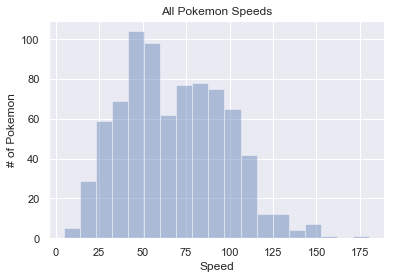

In [30]:
sns.set(style='darkgrid')

sns.distplot(pkmn['Speed'], kde=False)
plt.title('All Pokemon Speeds')
plt.ylabel('# of Pokemon')
plt.show()

Pros: More granular visualization of counts that correspond with speeds. See unevenness of distribution.
Cons: Difficult to ascertain summary statistics from

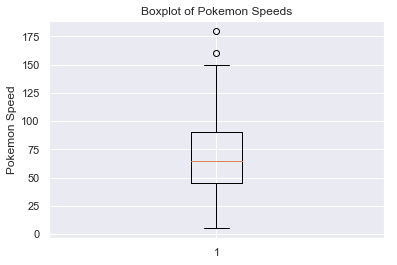

In [38]:
plt.boxplot(pkmn['Speed'])
plt.title('Boxplot of Pokemon Speeds')
plt.ylabel('Pokemon Speed')

plt.show()

Pros: Easily ascertain summary statistics and outliers visually
Cons: Cannot see true character and behavior of the distribution.

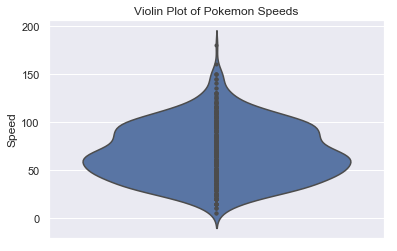

In [40]:
sns.violinplot(pkmn['Speed'], inner="points", orient = 'v')
plt.title('Violin Plot of Pokemon Speeds')
plt.show()

Pros: Visually pleasing.
Cons: Not anymore informative than a histogram; in fact it's less so because the curves represent a sort of density which gives an even more approximated representation of the distribution. Also, the symmetric display exaggerates how many counts lie in denser parts of the graphs vs less dense extremes; perhaps it doubles the area that the counts would actually occupy.

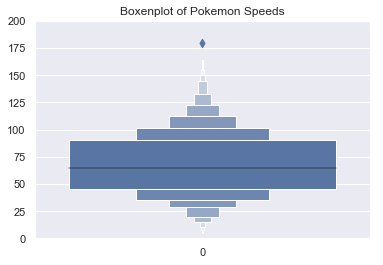

In [50]:
sns.boxenplot(data=pkmn['Speed'])
plt.title('Boxenplot of Pokemon Speeds')
plt.ylim(0,200)
plt.show()

Pros: Similar to the violin plot, but different in that the counts are represented with bars. Great visual representation of the distribution.
Cons: The graph sacrifices granualarity of the distribution for the visual aesthetic. While it harkens a histogram, larger counts are binned together to create pyrimids out of boxes and removing the detail achieved in a histogram. Potentially the area is being exaggerated because of teh symettric representation of the distribution density.

# Two Continuous Variables, Plotted 3 Different Ways

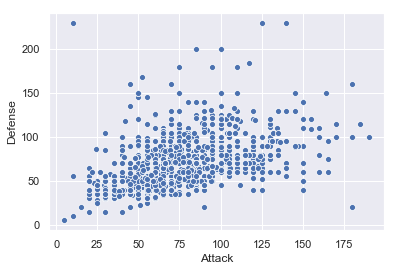

In [51]:
sns.scatterplot(x="Attack", y="Defense", data=pkmn)
plt.show()

Pros: Standard scatter plot. Visualizes each individual point. Great for seeing spread of points far apart and which ones clearly deviate from the general trend.
Cons: Difficult to visualize crowded data points in denser parts of the plot. Too many points overlap or layer on top of each other and there is no way of differentiating which parts have more point and which parts have less.

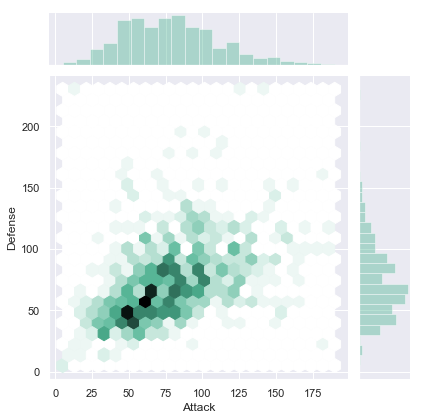

In [52]:
sns.jointplot(pkmn['Attack'],pkmn['Defense'], kind="hex", color="#4CB391")
plt.show()

Pros: Easy to tell which parts of the scatter plot are denser than others, especially when too many points overlap. Would complement a scatterplot very well. Still easy to tell the general trend of the data.
Cons: Exact positioning of the all data points are only approximated. 

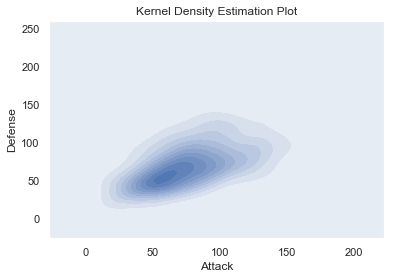

In [55]:
sns.kdeplot(pkmn['Attack'], pkmn['Defense'], shade=True)
plt.title('Kernel Density Estimation Plot')
plt.show()

Pros: Great way of visually discerning the general spread of a scatter plot.
Cons: Unable to see various extreme values / outliers. Density is lense granular to improve aesthetic of the plot. Easy to forget that there's a general trend because of teh focus on approxamates the scatter.

# One Continuous Variable and One Categorical Variable, 6 Different Ways

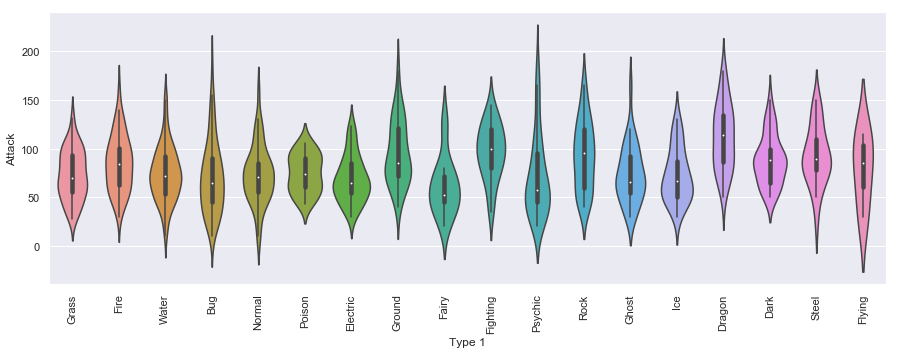

In [67]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Type 1', y='Attack', data=pkmn)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Pros: Easy to compare median values of each category. Can see that some categories have greater spreads than others.
Cons: Violin plots are only an approximate.

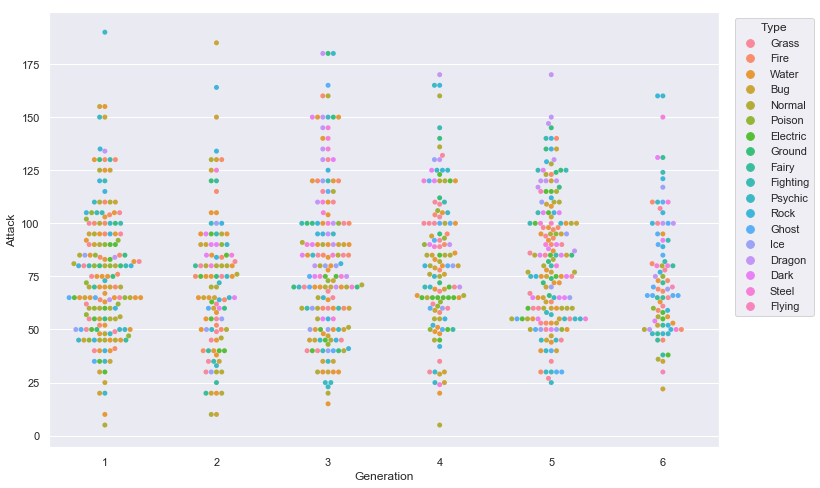

In [101]:
plt.figure(figsize=(12,8))
sns.swarmplot(x = 'Generation', hue = 'Type 1', y="Attack", data=pkmn)
plt.legend(title='Type', bbox_to_anchor=(1.15, 1))
plt.show()

Pros: Visualize every data point within each category.
Cons: Messy.

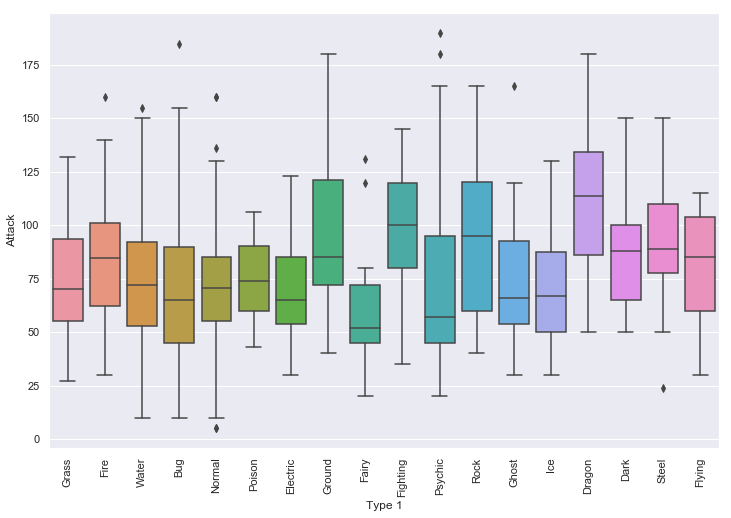

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Type 1', y='Attack', data=pkmn)
plt.xticks(rotation=90)
plt.show()

Pros: Better than the violin plots because the statical summary can be ascertained from the visual markers. Easy to tell medians and distriguish between category.
Cons: As with all whisker plots, the distribution is not acurately represented by the boxes.

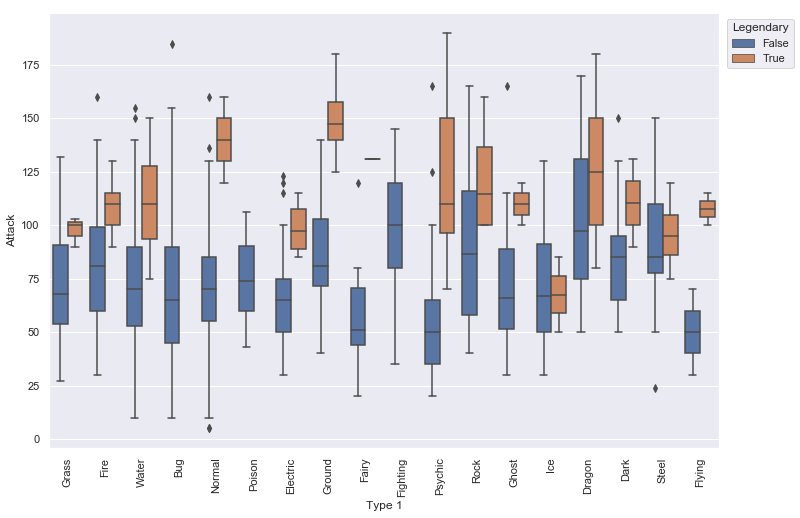

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Type 1', y='Attack', hue='Legendary', data=pkmn)
plt.legend(title='Legendary', bbox_to_anchor=(1.12, 1))
plt.xticks(rotation='90')
plt.show()

Pros: Visualize across two categorical data types.
Cons: As with all whisker plots, the distribution is not acurately represented by the boxes.

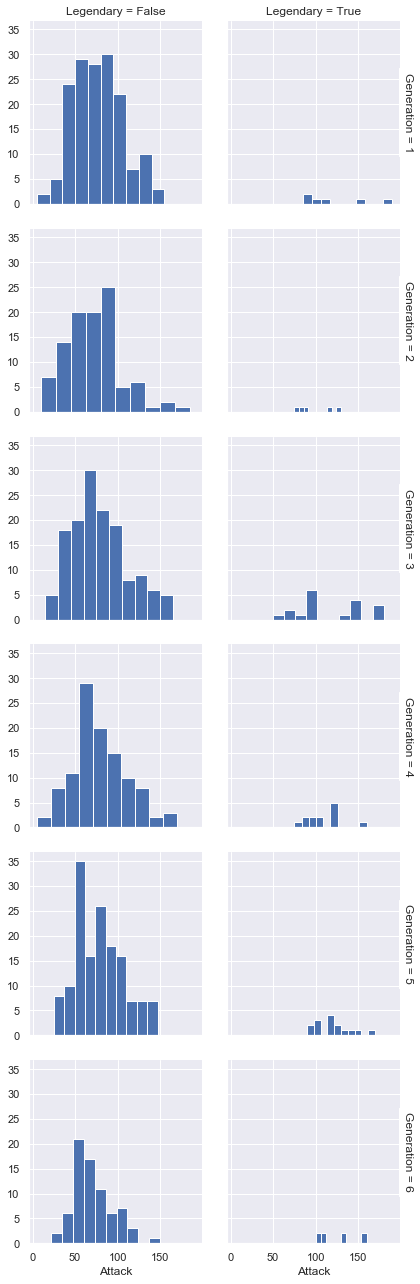

In [97]:
sns.FacetGrid(pkmn, row="Generation", col="Legendary", margin_titles=True).map(plt.hist, 'Attack')
plt.show()

Pros: Histograms show the most acurrate form of distribution across a single variable.
Cons: Not good for categorical data with too many categories; can get too large.

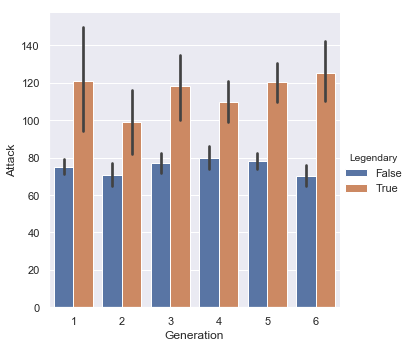

In [100]:
sns.catplot(x="Generation", y="Attack", hue="Legendary", data=pkmn, kind="bar")

Pros: Easily show the statistical difference between two distribution by see how the 'wicks' of the candle compare.
Cons: Wasted space, below. Very limited amount of data/insight communicated.